# Projekt 1 – perceptron Rosenblatta

## Temat: płytka sieć do nauki problemu XOR

### To do:
* Krótki opis problemu - eze
* Opis zaimplementowanych funkcji - eze
* Opis zaimplementowanych zmiennych i stałych - eze
* Wykresy błędu MSE (błędu średniokwadratowego) w obu warstwach (na przykładach uczących oraz na całym zbiorze uczącym) - nie jestem pewien o co chodzi z "w obu warstwach (na przykładach uczących oraz na całym zbiorze uczącym)"
* wykresy błędu klasyfikacji (przyjmujemy próg 0.5 dla klasyfikacji 0-1) - okej troche mi się nie chce
* wykresy wag w obu warstwach. - okej troche mi się nie chce

### To do - jak wystarczy czasu - pewnie nie wystarczy:
* szybsze kończenie uczenia przy spadku MSE poniżej zadanej wartości,
* dodanie momentum,
* adaptacyjny współczynnik uczenia,
* dodanie mini-batch.

In [4]:
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt

In [5]:
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

In [6]:
np.random.seed(0)

In [7]:
# generate data
def data_generator(random = False, multiply_by = 1, shuffle = True):
    if random:
        X = np.random.binomial(1, 0.5, (4*multiply_by, 2))
        Y = np.array([[X[i][0] ^ X[i][1]] for i in range(0,X.shape[0])])
    else:
        X = np.array([[0,0],[0,1],[1,0],[1,1]])
        Y = np.array([[0],[1],[1],[0]])
        X = np.tile(X, (multiply_by, 1))
        Y = np.tile(Y, (multiply_by, 1))
        
    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        Y = Y[indices]
    return X, Y

In [8]:
# activation function
def sigmoid(x): 
	return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x): 
    return x * (1 - x)

In [9]:
# weights and biases initialization
def initialize_params():
    # output layer weights and biases
    W1 = np.random.rand(inputLayerNeurons, hiddenLayerNeurons) - 0.5
    b1 = np.random.rand(1, hiddenLayerNeurons) - 0.5
    # hidden layer weights and biases
    W2 = np.random.rand(hiddenLayerNeurons, outputLayerNeurons) - 0.5
    b2 = np.random.rand(1, outputLayerNeurons) - 0.5
    return W1, b1, W2, b2

In [73]:
def forward_prop(W1, b1, W2, b2, X):
    # 1. layer
    Z1 = np.dot(X,W1) + b1
    A1 = sigmoid(Z1)
    
    # 2. layer
    Z2 = np.dot(A1,W2) + b2
    A2 = sigmoid(Z2)
    
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): 
    # 2. layer
    Err = (Y - A2) **2 # Zliczanie samego błędu MSE
    dA2 = 2*( Y - A2)  # Pochodna of Error
    dZ2 = dA2 * sigmoid_prime(A2)
    
    # 1. layer
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * sigmoid_prime(A1) 
    
    return dZ1, dZ2, dA2, Err

def backward_propMSE(Z1, A1, Z2, A2, W1, W2, X, Y): 
    # 2. layer
    Err = 1/2* ((Y - A2) **2)
    dA2 = (Y - A2) # Error
    dZ2 = dA2 * sigmoid_prime(A2)
    
    # 1. layer
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * sigmoid_prime(A1) 
    
    return dZ1, dZ2, dA2, Err

def update_params(W1, b1, W2, b2, dZ1, dZ2, X, A1, lr):
    # 1. layer
    W1 = W1 + lr * X.T.dot(dZ1)
    b1 = b1 + lr * np.sum(dZ1,axis=0,keepdims=True) * lr   
    
    # 2. layer 
    W2 = W2 + lr * A1.T.dot(dZ2)  
    b2 = b2 + lr * np.sum(dZ2,axis=0,keepdims=True) * lr    
    
    return W1, b1, W2, b2


In [74]:
# def get_predictions(A2):
### TO DO

# def get_accuracy(predictions, Y):
### TO DO

def gradient_descent(X, Y, lr, iterations, logs = True):
    W1, b1, W2, b2 = initialize_params()
    Error = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dZ1, dZ2, dA2, Err = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dZ1, dZ2, X, A1, lr)
        Error.append(np.mean(Err))
        if i % 100 == 0 and logs:
            print("Iteration: ", i)
            print(A2.T)
            print(Y.T)
    print("Final Predictions")
    print(A2.T)
    print(Y.T)
    return W1, b1, W2, b2, Error

def gradient_descent_MSE(X, Y, lr, iterations, logs = True):
    W1, b1, W2, b2 = initialize_params()
    Error = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dZ1, dZ2, dA2, Err = backward_propMSE(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dZ1, dZ2, X, A1, lr)
        Error.append(np.mean(Err))
        if i % 100 == 0 and logs:
            print("Iteration: ", i)
            print(A2.T)
            print(Y.T)
    print("Final Predictions")
    print(A2.T)
    print(Y.T)
    return W1, b1, W2, b2, Error

In [75]:
X, Y = data_generator(random = True, multiply_by = 1, shuffle = True)
#XMSE, YMSE = X,Y
#W1_MSE, b1_MSE, W2_MSE, b2_MSE, Error_MSE = gradient_descent_MSE(XMSE, YMSE, 0.2, 5000, logs = False) 
W1, b1, W2, b2, Error = gradient_descent(X, Y, 0.2, 5000, logs = False)
print(Error)
#print(Error_MSE)

Final Predictions
[[0.01244535 0.0148269  0.0148269  0.95291445]]
[[0 0 0 1]]
[0.292148246159988, 0.27972940479539116, 0.2686217775009919, 0.25876889944725406, 0.2500866517252329, 0.24247416826503246, 0.2358230470178564, 0.23002441477567126, 0.2249738550948964, 0.22057448209868058, 0.21673855674851095, 0.21338804791177907, 0.21045448786652346, 0.20787839734986352, 0.20560848091678663, 0.20360072986159625, 0.2018175205711159, 0.20022676030103692, 0.19880110770819776, 0.19751727937734798, 0.19635544364636742, 0.19529869732492167, 0.1943326179717683, 0.1934448832177026, 0.1926249484929169, 0.19186377497686036, 0.19115360034080145, 0.1904877457173258, 0.18986045320109007, 0.18926674900355536, 0.18870232812335186, 0.18816345704360532, 0.18764689152851985, 0.1871498070697807, 0.18666973993746117, 0.18620453712942026, 0.1857523137967795, 0.1853114169593969, 0.18488039452179872, 0.18445796876330336, 0.18404301361163206, 0.18363453512186736, 0.18323165467611968, 0.18283359449699257, 0.182439665

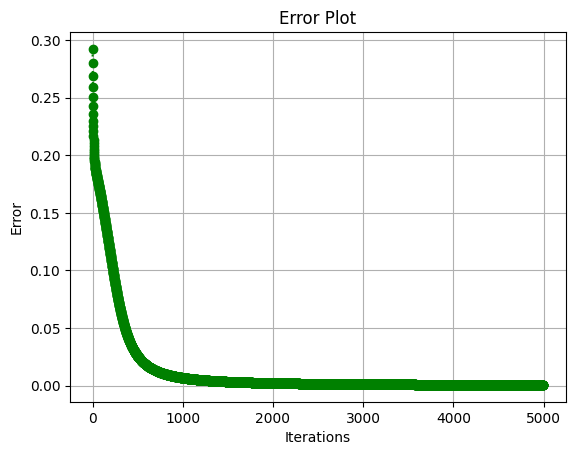

In [76]:
# Plotting the errors
plt.plot(Error, 'o:g')
#plt.plot(Error_MSE, 'o:r')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error Plot')
plt.grid(True)
plt.show()